<class 'pandas.core.frame.DataFrame'>
Index: 4787 entries, 97 to 11275
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   region            4787 non-null   object 
 1   production_field  4787 non-null   object 
 2   year              4787 non-null   int64  
 3   value             4787 non-null   float64
 4   region_standard   4787 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 224.4+ KB
None

Пропуски по колонкам:
 region              0
production_field    0
year                0
value               0
region_standard     0
dtype: int64

Уникальных регионов: 85
Уникальных лет: 16
Уникальных отраслей: 8

Статистика значений:
 count    4.787000e+03
mean     2.206526e+08
std      6.216324e+08
min      1.596780e+04
25%      8.559441e+06
50%      3.788467e+07
75%      1.638414e+08
max      9.969869e+09
Name: value, dtype: float64

Количество дубликатов: 0

Количество выбросов: 629

Топ-5

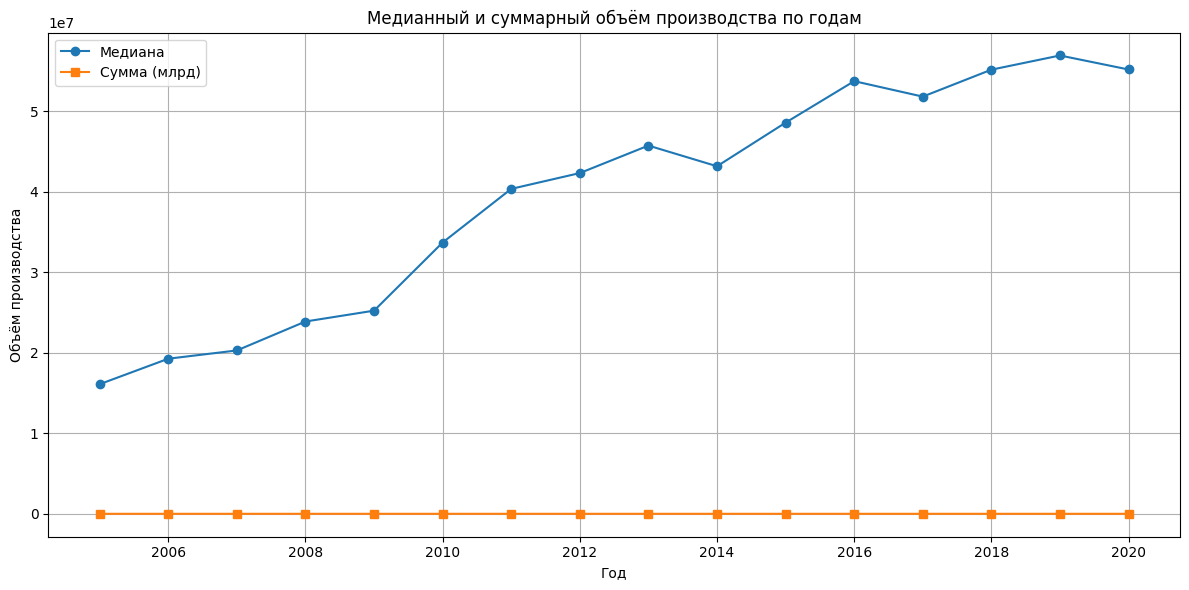

<Figure size 1600x600 with 0 Axes>

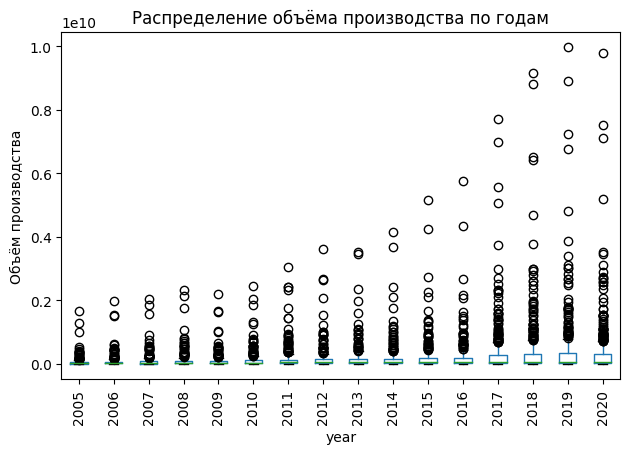

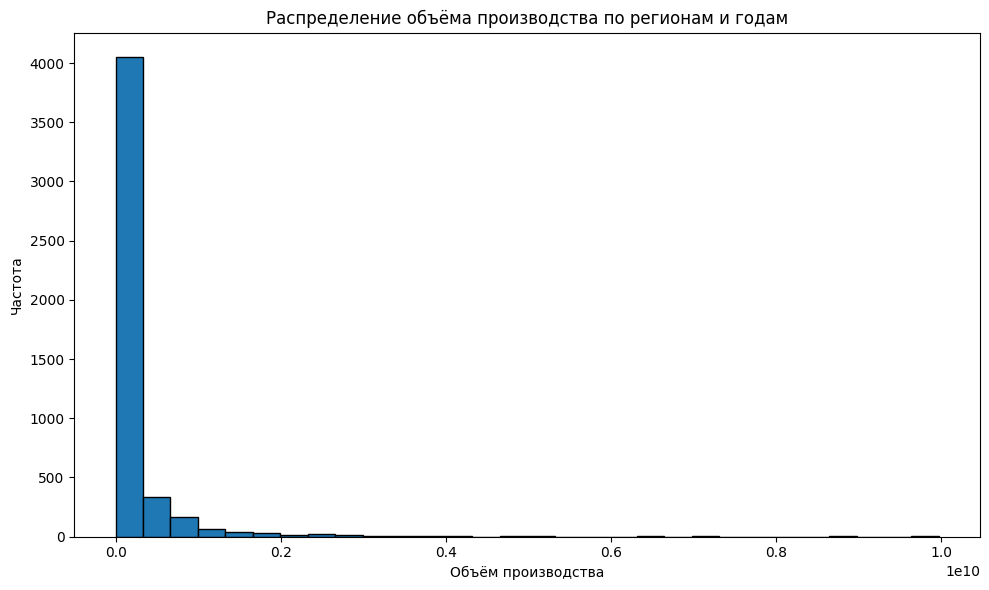

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Загрузка данных
file_path = "../../outputs/standardized_datasets/regional_production_standardized.csv"
df = pd.read_csv(file_path)

# 2. Оставляем только строки с region_standard
df = df[df["region_standard"].notna()]

# 3. Проверка типов и пропусков
print(df.info())
print("\nПропуски по колонкам:\n", df.isnull().sum())

# 4. Уникальные регионы, годы и отрасли
print("\nУникальных регионов:", df["region_standard"].nunique())
print("Уникальных лет:", df["year"].nunique())
print("Уникальных отраслей:", df["production_field"].nunique())

# 5. Статистика по объёму производства
print("\nСтатистика значений:\n", df["value"].describe())

# 6. Проверка дубликатов
duplicates = df.duplicated().sum()
print("\nКоличество дубликатов:", duplicates)

# 7. Проверка выбросов через IQR
Q1 = df["value"].quantile(0.25)
Q3 = df["value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["value"] < lower_bound) | (df["value"] > upper_bound)]
print("\nКоличество выбросов:", outliers.shape[0])

# 8. Топ-5 по максимальным значениям
top5 = df.sort_values(by="value", ascending=False).head(5)
print("\nТоп-5 записей:\n", top5[["region_standard", "year", "production_field", "value"]])

# 9. Тренды медианы и суммы
median_value = df.groupby("year")["value"].median()
sum_value = df.groupby("year")["value"].sum()

plt.figure(figsize=(12,6))
plt.plot(median_value.index, median_value.values, marker="o", label="Медиана")
plt.plot(sum_value.index, sum_value.values/1e9, marker="s", label="Сумма (млрд)")
plt.title("Медианный и суммарный объём производства по годам")
plt.xlabel("Год")
plt.ylabel("Объём производства")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 10. Boxplot
plt.figure(figsize=(16,6))
df.boxplot(column="value", by="year", grid=False, rot=90)
plt.title("Распределение объёма производства по годам")
plt.suptitle("")
plt.ylabel("Объём производства")
plt.tight_layout()
plt.show()

# 11. Гистограмма
plt.figure(figsize=(10,6))
plt.hist(df["value"], bins=30, edgecolor="black")
plt.title("Распределение объёма производства по регионам и годам")
plt.xlabel("Объём производства")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()


# EDA таблицы `regional_production_standardized.csv`

**Описание данных**
- 4,787 записей по 85 регионам.
- Период наблюдений: 16 лет.
- 8 отраслей производства.

---

**Типы данных**
- Все признаки корректны:
  - `year`: int64
  - `production_field`: object
  - `value`: float64
  - `region_standard`: object

---

**Пропуски**
- Отсутствуют.

---

**Дубликаты**
- Не обнаружено.

---

**Основные статистики**
- Среднее значение: ~220 млн.
- Медиана: ~37 млн.
- Минимум: ~16 тыс.
- Максимум: ~9.97 млрд.
- 75% записей — до ~164 млн.

---

**Выбросы**
- Количество выбросов по IQR: 629 записей.
- Основные выбросы: Москва, Тюменская область, Ханты-Мансийский АО.
- **Удалять не требуется**, значения реалистичны.

---

**Топ-5 регионов по объёму производства**
1. Москва — ~9.97 млрд (2019)
2. Москва — ~9.78 млрд (2020)
3. Москва — ~9.16 млрд (2018)
4. Тюменская область — ~8.90 млрд (2019)
5. Тюменская область — ~8.80 млрд (2018)

---

**Тренды**
- Суммарный объём производства устойчиво растёт.
- Медиана также увеличивается, но рост более умеренный.

---

**Визуализации**
- Boxplot показывает сильный разрыв между большинством регионов и топовыми значениями.
- Гистограмма подтверждает скошенное распределение.
- Графики трендов иллюстрируют рост.

---

**Вывод**
- Данные чистые и готовы к анализу и объединению.
- Для моделирования рекомендуется логарифмировать признак.


In [4]:
# Cохранение результатов после EDA
df.to_csv("../../data/clean/reg_production_AfterEDA.csv", index=False)